#### Importing packages and data

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, roc_curve, auc,confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [3]:
data = pd.read_csv("Ocena subskrypcji.csv", sep=';')

print(data.head(n=5))

   age           job  marital  education default  balance housing loan  \
0   58    management  married   tertiary      no     2143     yes   no   
1   44    technician   single  secondary      no       29     yes   no   
2   33  entrepreneur  married  secondary      no        2     yes  yes   
3   47   blue-collar  married    unknown      no     1506     yes   no   
4   33       unknown   single    unknown      no        1      no   no   

   contact  day month  duration  campaign  pdays  previous poutcome   y  
0  unknown    5   may       261         1     -1         0  unknown  no  
1  unknown    5   may       151         1     -1         0  unknown  no  
2  unknown    5   may        76         1     -1         0  unknown  no  
3  unknown    5   may        92         1     -1         0  unknown  no  
4  unknown    5   may       198         1     -1         0  unknown  no  


#### Clean data from outliers

In [4]:
print("Data shape before removing outliers:", data.shape)

def remove_outliers_from_column(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 3 * IQR
    upper_bound = Q3 + 3 * IQR

    return data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]

numeric_columns = data.select_dtypes(include=['float64', 'int64']).columns

for column in numeric_columns:
    data = remove_outliers_from_column(data, column)

print("Data shape after removing outliers:", data.shape)

Data shape before removing outliers: (45211, 17)
Data shape after removing outliers: (32756, 17)


#### One-hot encoding & correlation analysis 

C:\Users\filip\AppData\Local\Temp\ipykernel_7752\1871962312.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['y'] = data['y'].replace({'yes': 1, 'no': 0})


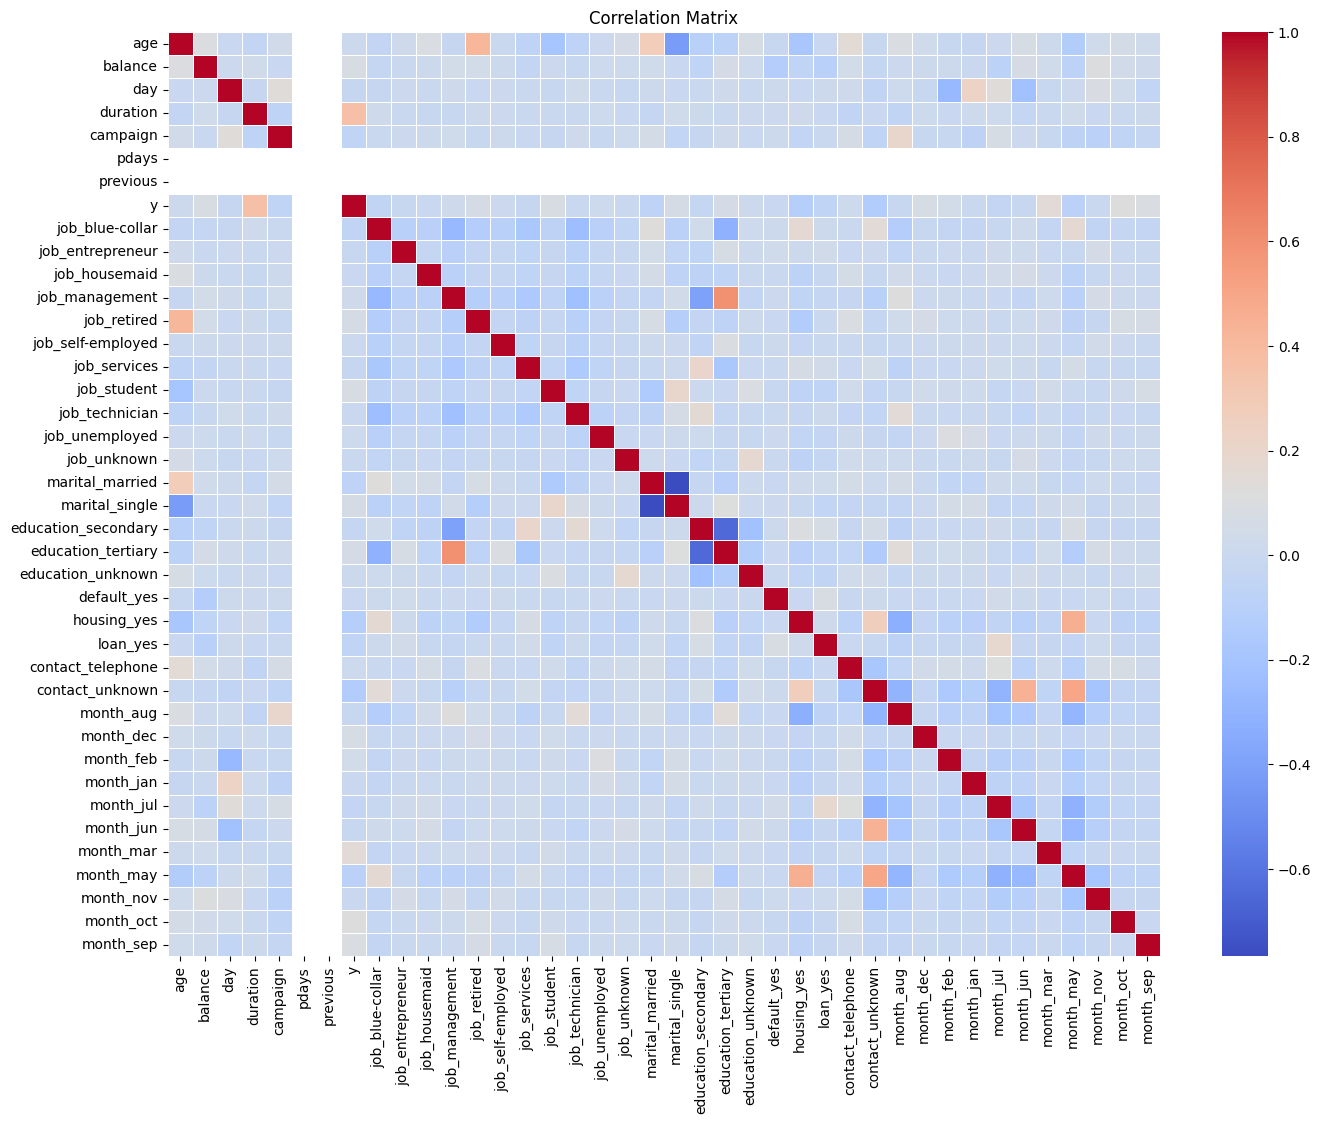

In [5]:
data['y'] = data['y'].replace({'yes': 1, 'no': 0})

non_numeric_columns = data.select_dtypes(exclude=['float64', 'int64']).columns
data_encoded = pd.get_dummies(data, columns=non_numeric_columns, drop_first=True)

correlation_matrix = data_encoded.corr()

plt.figure(figsize=(16, 12))

sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

In [8]:
print(data_encoded.head())

   age  balance  day  duration  campaign  pdays  previous  y  job_blue-collar  \
0   58     2143    5       261         1     -1         0  0            False   
1   44       29    5       151         1     -1         0  0            False   
2   33        2    5        76         1     -1         0  0            False   
3   47     1506    5        92         1     -1         0  0             True   
4   33        1    5       198         1     -1         0  0            False   

   job_entrepreneur  ...  month_dec  month_feb  month_jan  month_jul  \
0             False  ...      False      False      False      False   
1             False  ...      False      False      False      False   
2              True  ...      False      False      False      False   
3             False  ...      False      False      False      False   
4             False  ...      False      False      False      False   

   month_jun  month_mar  month_may  month_nov  month_oct  month_sep  
0      Fal

#### MLPClassifier with 1 hidden layer (10 neurons)

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report

X = data_encoded.drop(columns=["y"])
y = data_encoded["y"]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

mlp = MLPClassifier(hidden_layer_sizes=(10,), max_iter=500, random_state=42)
mlp.fit(X_train, y_train)

y_pred = mlp.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred, zero_division=1)

def print_model_results(accuracy, report):
    
    print(f"✔ **Dokładność (accuracy):** {accuracy:.2%} \n")
    
    print("✔ **Macierz klasyfikacji:**\n")
    print(report)

print_model_results(accuracy, report)

✔ **Dokładność (accuracy):** 92.38% 

✔ **Macierz klasyfikacji:**

              precision    recall  f1-score   support

           0       0.95      0.97      0.96      6066
           1       0.48      0.29      0.36       486

    accuracy                           0.92      6552
   macro avg       0.71      0.63      0.66      6552
weighted avg       0.91      0.92      0.92      6552



#### MLPClassifier with 5 hidden layers (10 neurons)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report

X = data_encoded.drop(columns=["y"])
y = data_encoded["y"]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

mlp = MLPClassifier(hidden_layer_sizes=(10, 5), max_iter=500, random_state=42)
mlp.fit(X_train, y_train)

y_pred = mlp.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred, zero_division=1)

def print_model_results(accuracy, report):
    
    print(f"✔ **Dokładność (accuracy):** {accuracy:.2%} \n")
    
    print("✔ **Macierz klasyfikacji:**\n")
    print(report)

print_model_results(accuracy, report)

✔ **Dokładność (accuracy):** 92.43% 

✔ **Macierz klasyfikacji:**

              precision    recall  f1-score   support

           0       0.95      0.97      0.96      6066
           1       0.49      0.34      0.40       486

    accuracy                           0.92      6552
   macro avg       0.72      0.66      0.68      6552
weighted avg       0.91      0.92      0.92      6552



#### Perceptron

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score, classification_report

X = data_encoded.drop(columns=["y"])
y = data_encoded["y"]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

perceptron = Perceptron(max_iter=1000, random_state=42)

perceptron.fit(X_train, y_train)

y_pred = perceptron.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred, zero_division=1)

def print_model_results(accuracy, report):
    print("\n **Wyniki Modelu Perceptron**\n")
    print(f"✔ **Dokładność (accuracy):** {accuracy:.2%} \n")
    print("✔ **Macierz klasyfikacji:**\n")
    print(report)

print_model_results(accuracy, report)



 **Wyniki Modelu Perceptron**

✔ **Dokładność (accuracy):** 91.41% 

✔ **Macierz klasyfikacji:**

              precision    recall  f1-score   support

           0       0.93      0.98      0.95      6066
           1       0.32      0.14      0.19       486

    accuracy                           0.91      6552
   macro avg       0.63      0.56      0.57      6552
weighted avg       0.89      0.91      0.90      6552

